In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X, y = data["data"], data["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pd.DataFrame(X_train,columns=data["feature_names"])
X_test = pd.DataFrame(X_test,columns=data["feature_names"])
y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

cv_loss = []
cv_learning = []

shuffle=True
alpha = 100 # 100 # regularization and also affeccts parameter in 'optimal' learning rate
tol = 1e-4 # 1e-4
eta0 = 1e-6 # 1e-6 # constant / initial learning rate
n_iter_no_change = 10 # 10
max_iter = 1000
epsilon = 0.1 # 0.01
power_t = 0.25 # 0.1, 2
penalty = 'l2'
for loss in ['squared_loss','huber','squared_epsilon_insensitive','epsilon_insensitive']:
    cv_loss.append(cross_validate(SGDRegressor(loss=loss,
                                               penalty=penalty,
                                               shuffle=shuffle,
                                               alpha=alpha,
                                               tol=tol,
                                               eta0=eta0,
                                               n_iter_no_change=n_iter_no_change,
                                               max_iter=max_iter,
                                               epsilon=epsilon,
                                               power_t=power_t), 
                            X_train,
                            y_train,
                            cv = 5,# we will keep it at 5, since that gives each sample set around 80 samples
                            return_train_score = True,
                            return_estimator = True,
                            n_jobs = 2))
    
for l_r in ['constant','optimal','invscaling','adaptive']:

    cv_learning.append(cross_validate(SGDRegressor(learning_rate=l_r,
                                                   penalty=penalty,
                                                   shuffle=shuffle,
                                                   alpha=alpha,
                                                   tol=tol,
                                                   eta0=eta0,
                                                   n_iter_no_change=n_iter_no_change,
                                                   max_iter=max_iter,
                                                   epsilon=epsilon,
                                                   power_t=power_t),
                            X_train,
                            y_train,
                            cv = 5,# we will keep it at 5, since that gives each sample set around 80 samples
                            return_train_score = True,
                            return_estimator = True,
                            n_jobs = 2))
    
# default learning rates are very off, need to play around with normalizations, learning rates, and intial
# learning initialization to get to some sort of acceptable scores

# good example of where default parameters lead to completly wrong results

In [26]:
# coefficients are massive with default values
print('coef:',cv_learning[2]["estimator"][0].coef_)
print('n_iter:',cv_learning[2]["estimator"][0].n_iter_)
#Not hitting anywhere near max_iter limit

coef: [-0.03001522  0.09311826 -0.01720922  0.00090023  0.00064517  0.02080718
  0.02177363  0.0053461  -0.00028036 -0.00091343  0.01037898  0.05899891
 -0.05495174]
n_iter: 95


In [7]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
print(ridge_reg.coef_)

[[-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
  -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
   2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
  -4.98849035e-01]]


In [8]:
def plotCVResults(cv_res, names):
    fig = plt.figure(figsize=(20,10))
    trainin_time_ax = fig.add_subplot(2,1,2)
    for i in range(4):
        name = names[i]
        df_reg = pd.DataFrame(cv_res[i])

        ax = fig.add_subplot(2,4,i+1)

        ax.set_title(name + " scores, adj. avg test: " + \
                     str(round(df_reg.loc[df_reg["test_score"]>0]["test_score"].mean(),2)))
        ax.set_xlabel("iteration")
        ax.set_ylabel("R2 score")
        ax.set_ylim(0,1)
        df_reg[["train_score","test_score"]].plot(ax=ax)

        df_reg["fit_time"].plot(ax=trainin_time_ax,label=name)

    plt.sca(trainin_time_ax)
    plt.legend()
    plt.show()

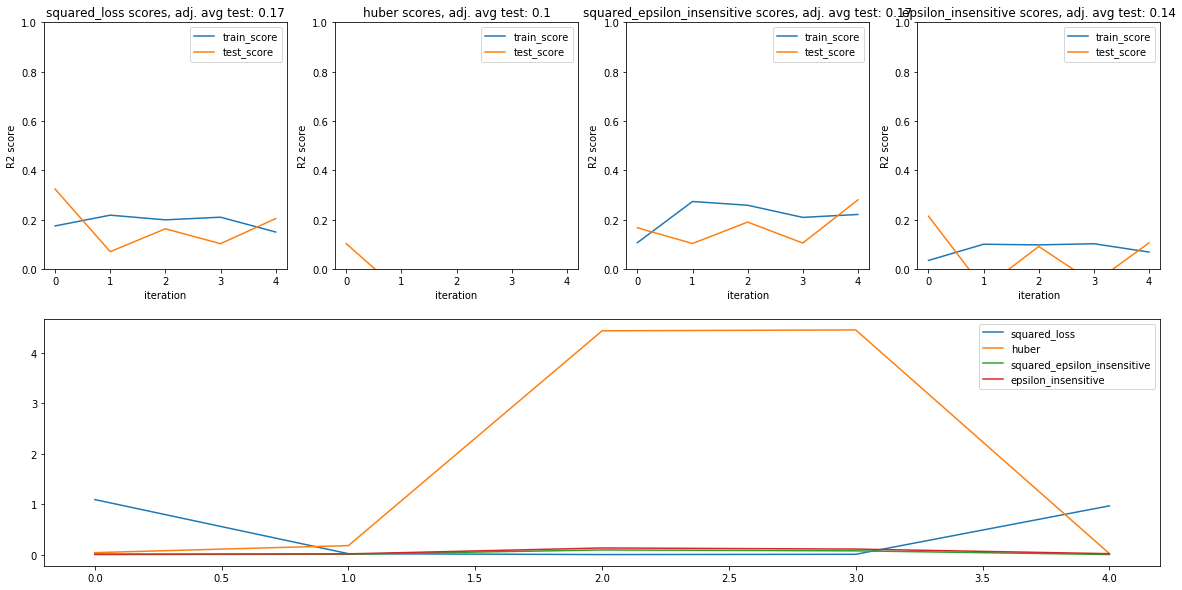

In [27]:
plotCVResults(cv_loss, ['squared_loss','huber','squared_epsilon_insensitive','epsilon_insensitive'])

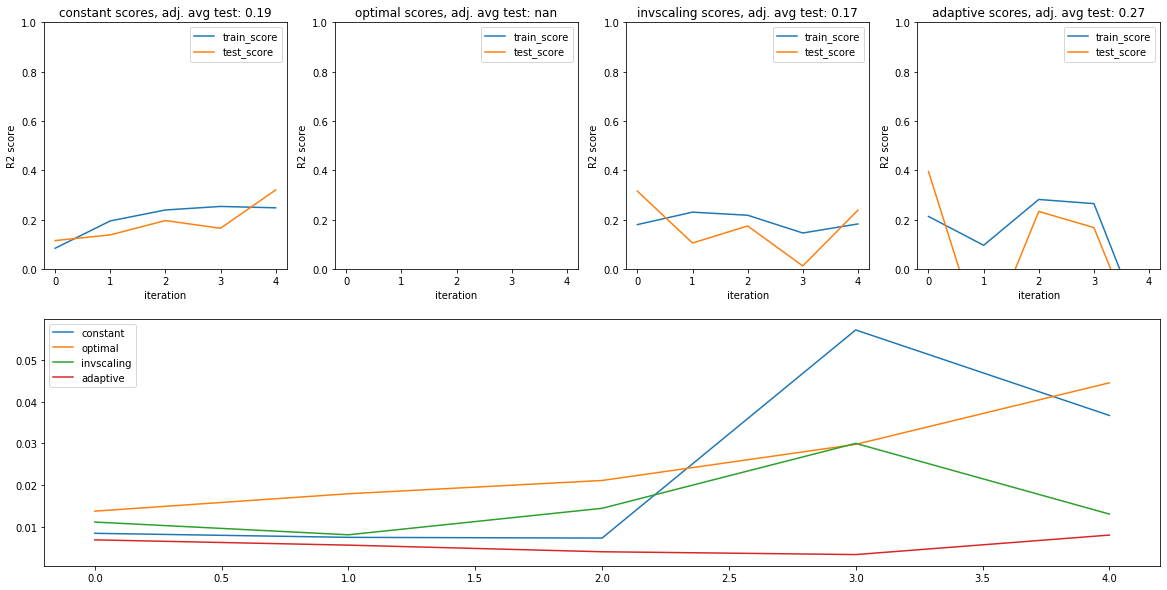

In [28]:
plotCVResults(cv_learning, ['constant','optimal','invscaling','adaptive'])